# Тестовое задание

In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [34]:
import pandas as pd
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

Перед тем как импортировать файл, необходимо бвло перевести его в кодировку UTF-8.

In [3]:
df=pd.read_csv('summer_camp_data.xls.csv', parse_dates=['date'], date_parser=custom_date_parser, encoding='cp1251')

In [4]:
df[:5]

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52724 non-null  datetime64[ns]
 1   source              52724 non-null  object        
 2   medium              52724 non-null  object        
 3   delivery_available  52724 non-null  object        
 4   device_type         52724 non-null  object        
 5   promo_activated     52724 non-null  object        
 6   filter_used         52724 non-null  object        
 7   pageviews           52724 non-null  int64         
 8   visits              52724 non-null  int64         
 9   productClick        52724 non-null  int64         
 10  addToCart           52724 non-null  int64         
 11  checkout            52724 non-null  int64         
 12  transactions        52724 non-null  int64         
 13  revenue             52724 non-null  float64   

In [6]:
df.isna().sum()

date                  0
source                0
medium                0
delivery_available    0
device_type           0
promo_activated       0
filter_used           0
pageviews             0
visits                0
productClick          0
addToCart             0
checkout              0
transactions          0
revenue               0
dtype: int64

In [7]:
df['date'].max()
df['date'].min()

Timestamp('2020-09-30 00:00:00')

Timestamp('2020-01-01 00:00:00')

<AxesSubplot:>

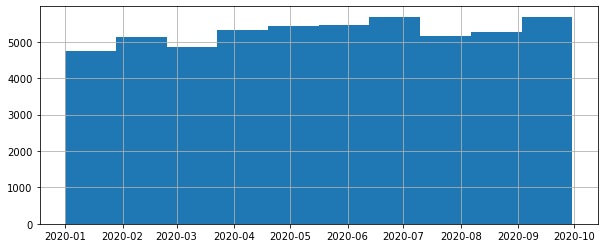

In [8]:
df['date'].hist(figsize=(10, 4))

Посмотрели, что есть данные по всем датам, которые нам даны.

## Какой рекламный канал принёс больше всего дохода за всё время?

In [9]:
revenue=df.groupby('source')['revenue'].sum().reset_index()

In [10]:
revenue=revenue.sort_values(by='revenue', ascending=False)

In [11]:
revenue['revenue'] = ([format(x, '.2f') for x in revenue['revenue']])

In [12]:
revenue[:3]

,source,revenue
21,yandex,467474813.00
12,google,456517017.00
0,(direct),238447371.25


Больший доход принес рекламный канал от яндекса **467474813.00**

## Как изменился средний чек транзакции после введения коронавирусных ограничений? Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)

С 29 марта 2020 года, были введены коронавирусные ограничения которые распространялись на всех жителей Москвы.
Для того, чтобы найти как изменился средний чек транзакции, разделим доход на транзакции и найдем среднее значение.

In [13]:
before_covid=df.query("date<'2020-03-29'")
after_covid=df.query("date>='2020-03-29'")

Средний чек до ограничений: 1289.01
Средний чек после ограничений: 1188.62
100.3900000000001


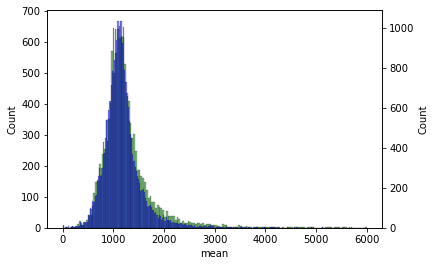

In [14]:
def avg_check(df1, df2, setting1, setting2):
    df1['mean']=df1['revenue']/df1['transactions']
    print(setting1, round(df1['mean'].mean(),2))

    df2['mean']=df2['revenue']/df2['transactions']
    print(setting2, round(df2['mean'].mean(),2))
    print(round(df1['mean'].mean(),2)-round(df2['mean'].mean(),2))
    fig, ax = plt.subplots();
    sns.histplot(df1['mean'], ax=ax, color='g', alpha=0.5, binrange=(0,6000));
    ax2 = ax.twinx();
    sns.histplot(df2['mean'], ax=ax2, color='b', alpha=0.5, binrange=(0,6000));
    plt.show();
    
avg_check(before_covid, after_covid, 'Средний чек до ограничений:', 'Средний чек после ограничений:')

In [15]:
with_promo=df.query("promo_activated=='yes'")
without_promo=df.query("promo_activated=='no'")

Средний чек с промокодом: 1224.53
Средний чек без промокода: 1214.41
10.11999999999989


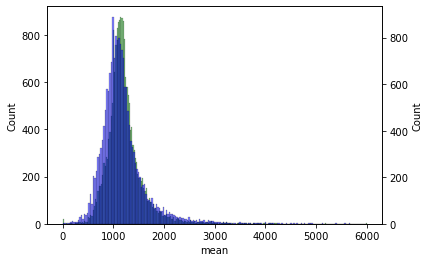

In [16]:
avg_check(with_promo, without_promo, 'Средний чек с промокодом:', 'Средний чек без промокода:')

Средний чек в случае с введенными коронавирусными ограничениями уменьшился на 100.39.
- До ограничений чек равен **1289.01**;
- После ограничений чек равен **1188.62**.

Средний чек с использованием промокода выше на 10.12
- Средний чек с промокодом равен **1224.53**;
- Средний чек без промокода равен **1214.41**.

## Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?

Для того, чтобы проверить, что CR в выходные дни отличается от CR в будние дни, надо сформулировать нулевую и альтернативную гипотезы. 

*H0 - Коэффициент конверсии в транзакцию равны в выходные и будние дни;*

*H1 - Коэффициент конверсии в транзакцию отличаются в выходные и будние дни.*

Для проверки гипотез необходимо выбрать статистический тест, с помощью которого мы их проверим. 

In [17]:
df['day']=df['date'].dt.dayofweek #отдельно добавим дни недели, чтобы выбрать выходные дни

In [18]:
df_weekend=df.query('day==(5, 6)') 
df_working=df.query('day==(0, 1, 2, 3, 4)')

In [19]:
def cr(df1):
    df1['cr']=df1['transactions']/df1['visits'] #посчитаем конверсию для двух выборок
cr(df_weekend)
cr(df_working)

In [20]:
df_weekend=df_weekend['cr']
df_working=df_working['cr']

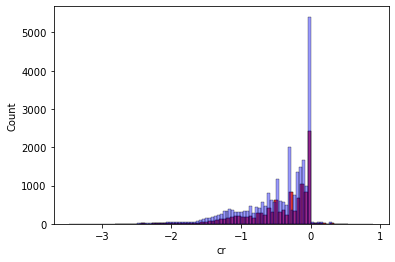

In [21]:
sns.histplot(np.log10(df_weekend), color='r');
sns.histplot(np.log10(df_working), color='b', alpha=.4);

Выборки имеют одинаковое распределение отличное от нормального, поэтому можно использовать тест Манна-Уитни для оценки различий между двумя выборками.

Возьмем уровень значимости равный alpha = 0.05.

In [22]:
alpha=.05
res=stats.mannwhitneyu(df_weekend, df_working)
if res.pvalue<alpha:
    print('Отвергаем нулевую гипотезу', res.pvalue)
else:
    print('Не можем отклонить нулевую гипотезу', res.pvalue)

Отвергаем нулевую гипотезу 5.3434106585064526e-14


Мы получили уровень значимости намного ниже 0.05, следовательно мы можем предположить, что коэффициенты конверсии в транзакцию отличаются.

## Вам необходимо спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед. 

In [23]:
cpc=df.query('medium=="cpc"')

In [24]:
cpc['month']=cpc['date'].dt.month

In [25]:
cpc.drop(['day', 'date', 'source', 'medium', 'delivery_available','device_type'], axis=1, inplace=True)

In [26]:
# используем кодировщик, чтобы "перевести" строковые названия в числа
print(cpc[['promo_activated', 'filter_used']].head())
encoder =  LabelEncoder()

cpc['promo_activated'] = encoder.fit_transform(cpc['promo_activated']) 
cpc['filter_used'] = encoder.fit_transform(cpc['filter_used'])

print(cpc[['promo_activated', 'filter_used']].head())

  promo_activated filter_used
1             yes          no
2              no          no
3              no          no
5              no          no
7              no          no
   promo_activated  filter_used
1                1            0
2                0            0
3                0            0
5                0            0
7                0            0


In [27]:
corr=cpc.corr()

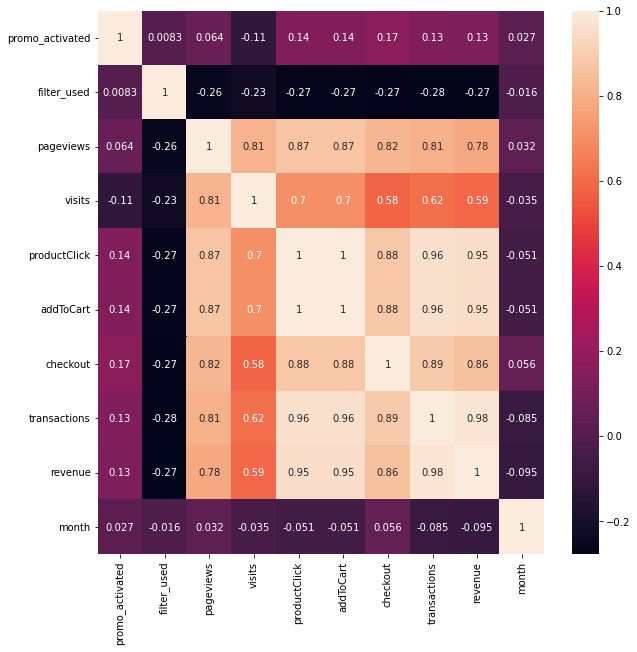

In [28]:
plt.figure(figsize=(10, 10));
sns.heatmap(corr, annot=True);

In [29]:
#разделили данные на признаки и целевую переменную
X=cpc.drop('revenue', axis=1)
y=cpc['revenue']
#разделили модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#создали объект класса StandardScaler и применили его к обучающей выборке
scaler = StandardScaler()
#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train)  
#стандартизируем
X_test_st = scaler.transform(X_test)

In [31]:
#обучили модель
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)
#сделали прогнозы
predict=model.predict(X_test)

LogisticRegression(random_state=42)

In [32]:
#обучили модель
model_ridge=Ridge(random_state=42)
model_ridge.fit(X_train, y_train)
#сделали прогнозы
predict_ridge=model_ridge.predict(X_test)

Ridge(random_state=42)

In [35]:
print('R2 для модели линейной регрессии',r2_score(y_test, predict))
print('R2 для модели ридж-регрессии', r2_score(y_test, predict_ridge))

R2 для модели линейной регрессии -5.919875658184905
R2 для модели ридж-регрессии 0.9542904812574625


Для прогнозирования объема дохода лучше использовать ридж-регрессию.